# <center>Decision Trees</center>

In this notebook, a popular machine learning algorithm, Decision Tree is implemented as a classification algorithm to build a model from historical data of patients, and their response to different medications. The model is then trained to predict the class of a unknown patient, or to find a proper drug for a new patient.

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

### About dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. 

It is a sample of binary classifier, and you can use the training part of the dataset 
to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.


### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [2]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-06-18 19:35:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-06-18 19:35:51 (357 MB/s) - ‘drug200.csv’ saved [6027/6027]



now, read data using pandas dataframe:

In [3]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]
print(my_data)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


## Pre-processing

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>

    
    <li> <b> y </b> as the <b> response vector (target) </b> </li>


   
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [4]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]
print(X)

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.113999999999999]
 [28 'F' 'NORMAL' 'HIGH' 7.797999999999999]
 [61 'F' 'LOW' 'HIGH' 18.043]
 [22 'F' 'NORMAL' 'HIGH' 8.607000000000001]
 [49 'F' 'NORMAL' 'HIGH' 16.275]
 [41 'M' 'LOW' 'HIGH' 11.037]
 [60 'M' 'NORMAL' 'HIGH' 15.171]
 [43 'M' 'LOW' 'NORMAL' 19.368]
 [47 'F' 'LOW' 'HIGH' 11.767000000000001]
 [34 'F' 'HIGH' 'NORMAL' 19.199]
 [43 'M' 'LOW' 'HIGH' 15.376]
 [74 'F' 'LOW' 'HIGH' 20.941999999999997]
 [50 'F' 'NORMAL' 'HIGH' 12.703]
 [16 'F' 'HIGH' 'NORMAL' 15.515999999999998]
 [69 'M' 'LOW' 'NORMAL' 11.455]
 [43 'M' 'HIGH' 'HIGH' 13.972000000000001]
 [23 'M' 'LOW' 'HIGH' 7.297999999999999]
 [32 'F' 'HIGH' 'NORMAL' 25.974]
 [57 'M' 'LOW' 'NORMAL' 19.128]
 [63 'M' 'NORMAL' 'HIGH' 25.916999999999998]
 [47 'M' 'LOW' 'NORMAL' 30.568]
 [48 'F' 'LOW' 'HIGH' 15.036]
 [33 'F' 'LOW' 'HIGH' 33.486]
 [28 'F' 'HIGH' 'NORMAL' 18.809]
 [31 'M' 'HIGH' 'HIGH' 30.366]
 [49 'F' 'NORMAL' 'NORMAL' 9.381]
 [39 'F' '

As you may figure out, some featurs in this dataset are catergorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__
Convert categorical variable into dummy/indicator variables.

In [5]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]
print(X)


[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.113999999999999]
 [28 0 2 0 7.797999999999999]
 [61 0 1 0 18.043]
 [22 0 2 0 8.607000000000001]
 [49 0 2 0 16.275]
 [41 1 1 0 11.037]
 [60 1 2 0 15.171]
 [43 1 1 1 19.368]
 [47 0 1 0 11.767000000000001]
 [34 0 0 1 19.199]
 [43 1 1 0 15.376]
 [74 0 1 0 20.941999999999997]
 [50 0 2 0 12.703]
 [16 0 0 1 15.515999999999998]
 [69 1 1 1 11.455]
 [43 1 0 0 13.972000000000001]
 [23 1 1 0 7.297999999999999]
 [32 0 0 1 25.974]
 [57 1 1 1 19.128]
 [63 1 2 0 25.916999999999998]
 [47 1 1 1 30.568]
 [48 0 1 0 15.036]
 [33 0 1 0 33.486]
 [28 0 0 1 18.809]
 [31 1 0 0 30.366]
 [49 0 2 1 9.381]
 [39 0 1 1 22.697]
 [45 1 1 0 17.951]
 [18 0 2 1 8.75]
 [74 1 0 0 9.567]
 [49 1 1 1 11.014000000000001]
 [65 0 0 1 31.875999999999998]
 [53 1 2 0 14.133]
 [46 1 2 1 7.285]
 [32 1 0 1 9.445]
 [39 1 1 1 13.937999999999999]
 [39 0 2 1 9.709]
 [15 1 2 0 9.084]
 [73 0 2 0 19.221]
 [58 0 0 1 14.239]
 [50 1 2 1 15.79]
 [23 1 2 0 12.26]
 [50 0 2 1 12.295]
 [66 0 2 1 8.1

Now we can fill the target variable.

In [6]:
y = my_data["Drug"]
y[0:5]
print(y)

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

In [7]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [8]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Practice
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [12]:
# your code
print(X_trainset.shape)
print(y_trainset.shape)



(140, 5)
(140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [13]:
print(X_testset.shape)
print(y_testset.shape)



(60, 5)
(60,)


## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [14]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [15]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [16]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [17]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


## Visualization
Lets visualize the tree

In [22]:
pip install pydotplus

     |████████████████████████████████| 278 kB 4.6 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=b59b7fb9141d58857fcb6233811ed15157af9664525da4d0f28889801cc8d795
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [23]:
#from sklearn.externals.six import StringIO
import io
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

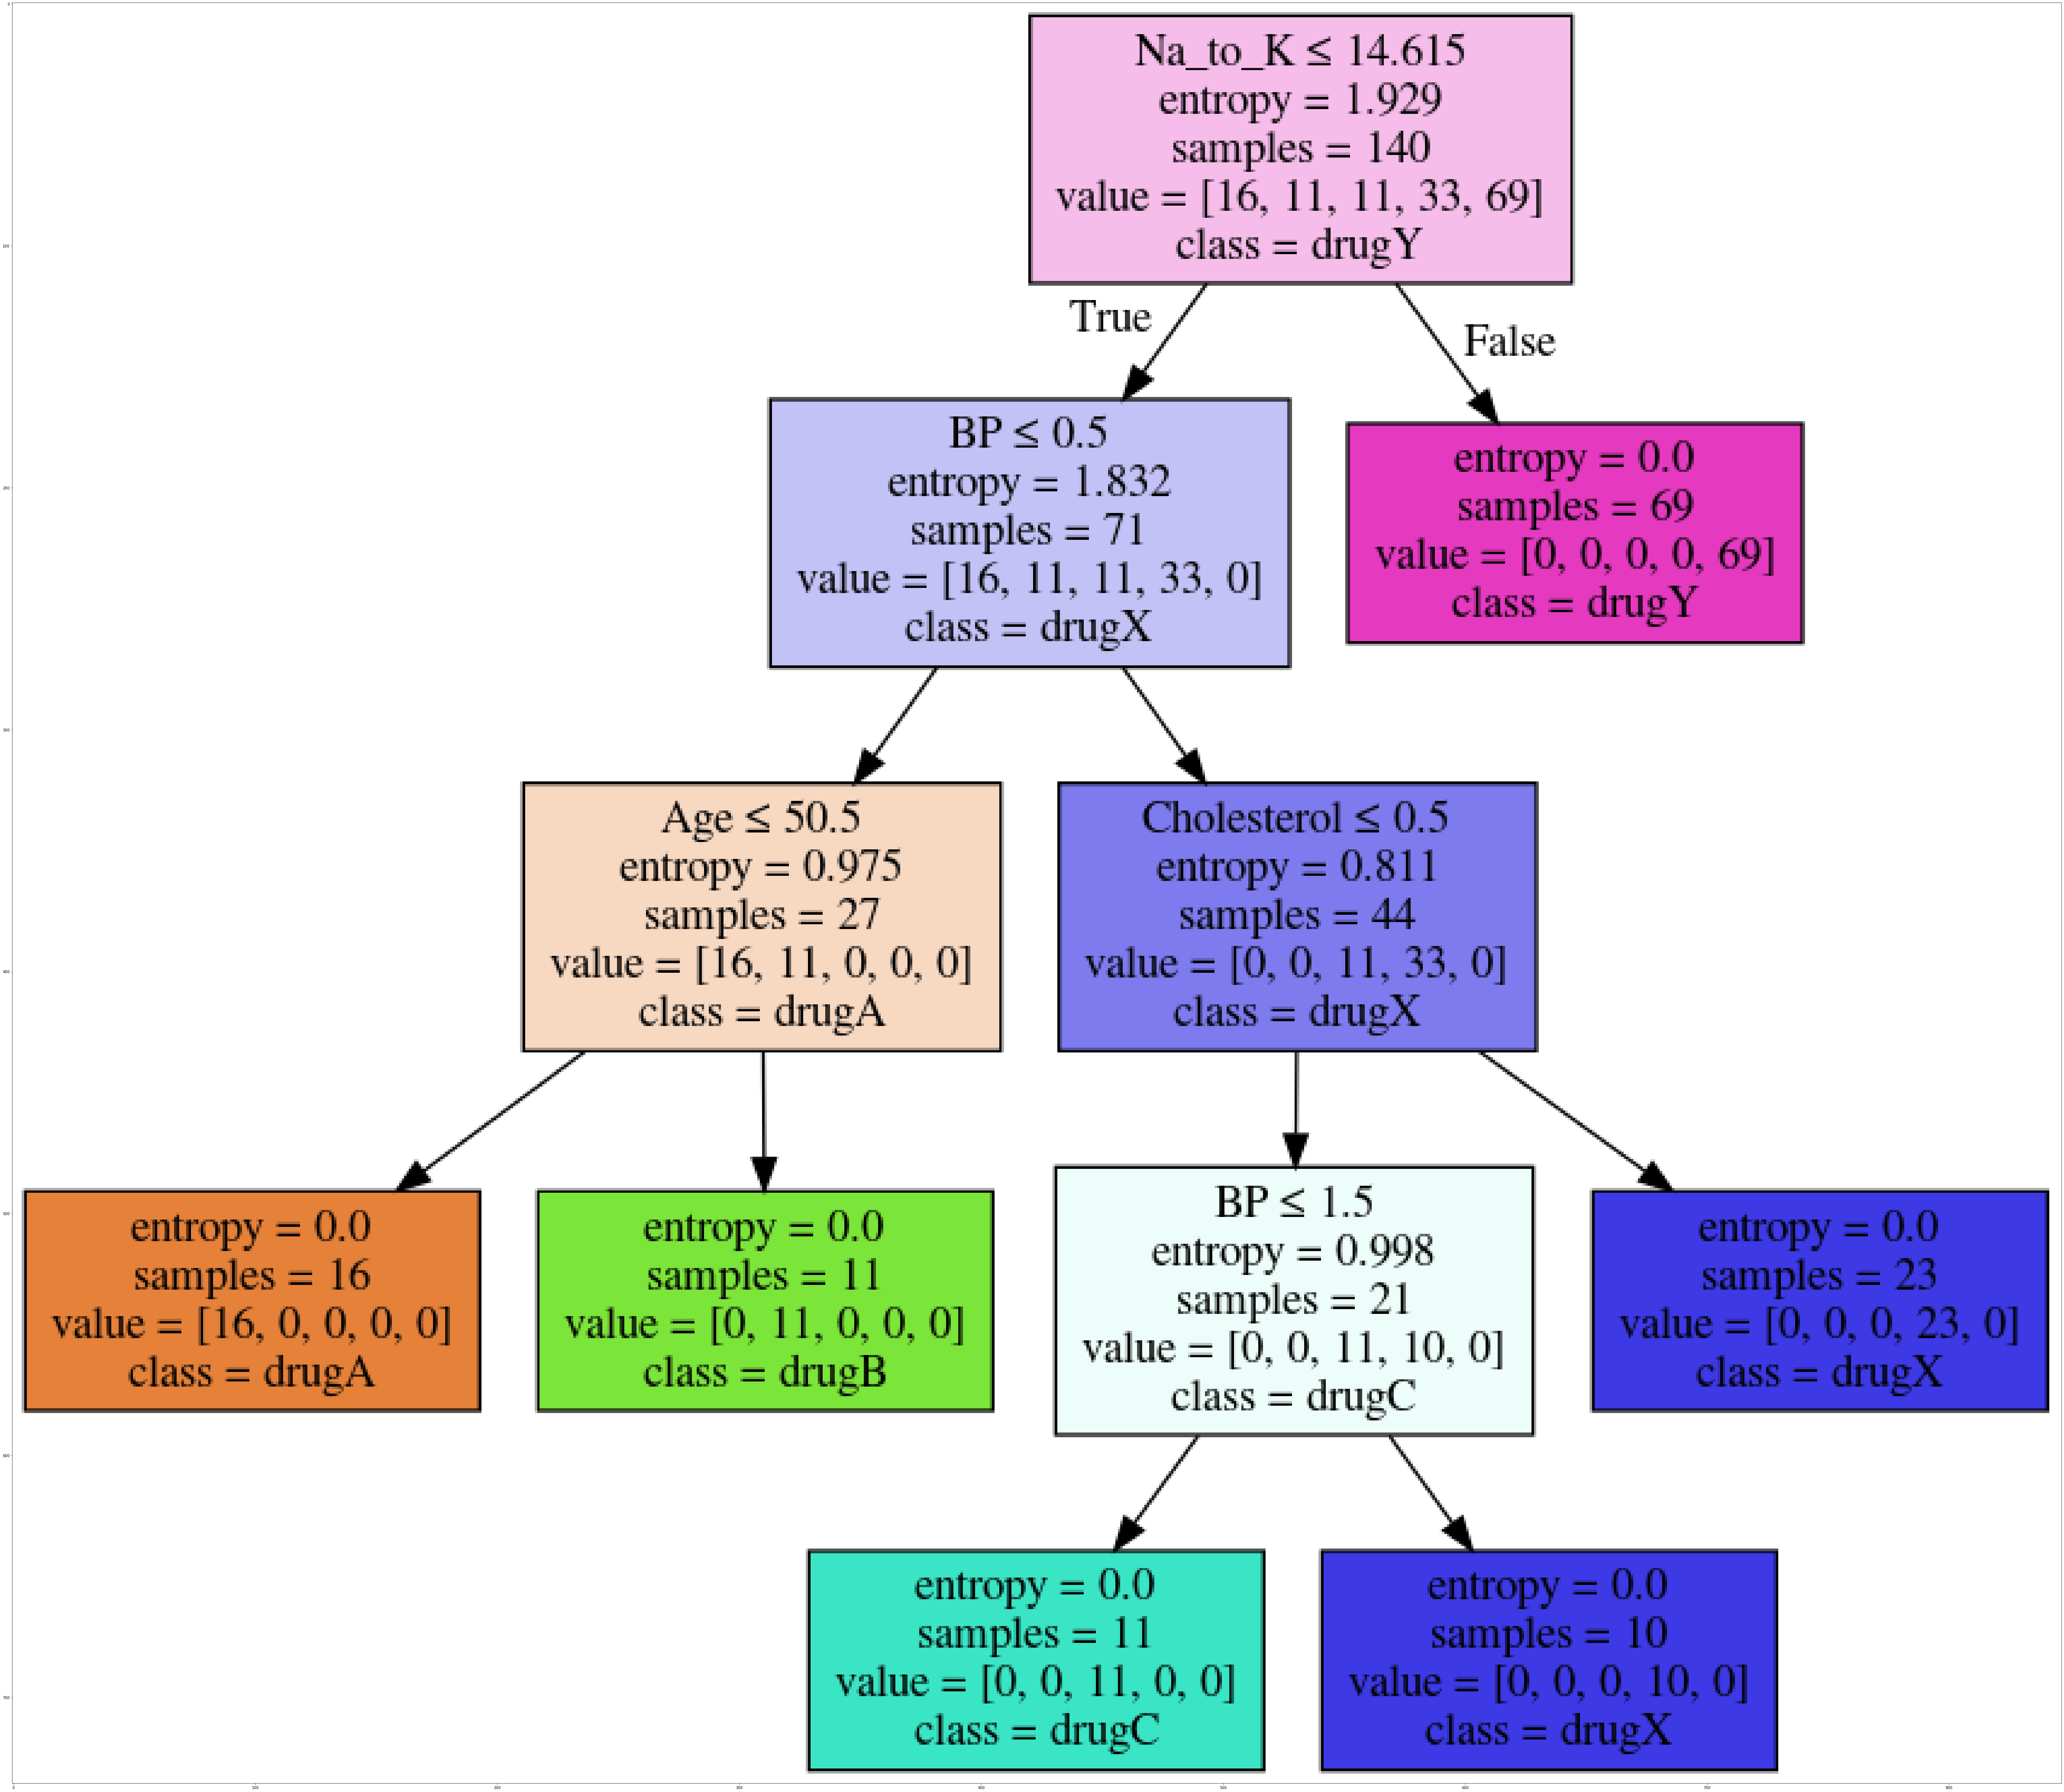

In [24]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')